In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create a model class


In [2]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model = Model()

## Load the iris dataset

In [4]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Plot the dataset
The iris dataset has 4 features. To get an idea how they correlate we can plot four different relationships among them.<br>
We'll use the index positions of the columns to grab their names in pairs with <tt>plots = [(0,1),(2,3),(0,2),(1,3)]</tt>.<br>
Here <tt>(0,1)</tt> sets "sepal length (cm)" as <tt>x</tt> and "sepal width (cm)" as <tt>y</tt>

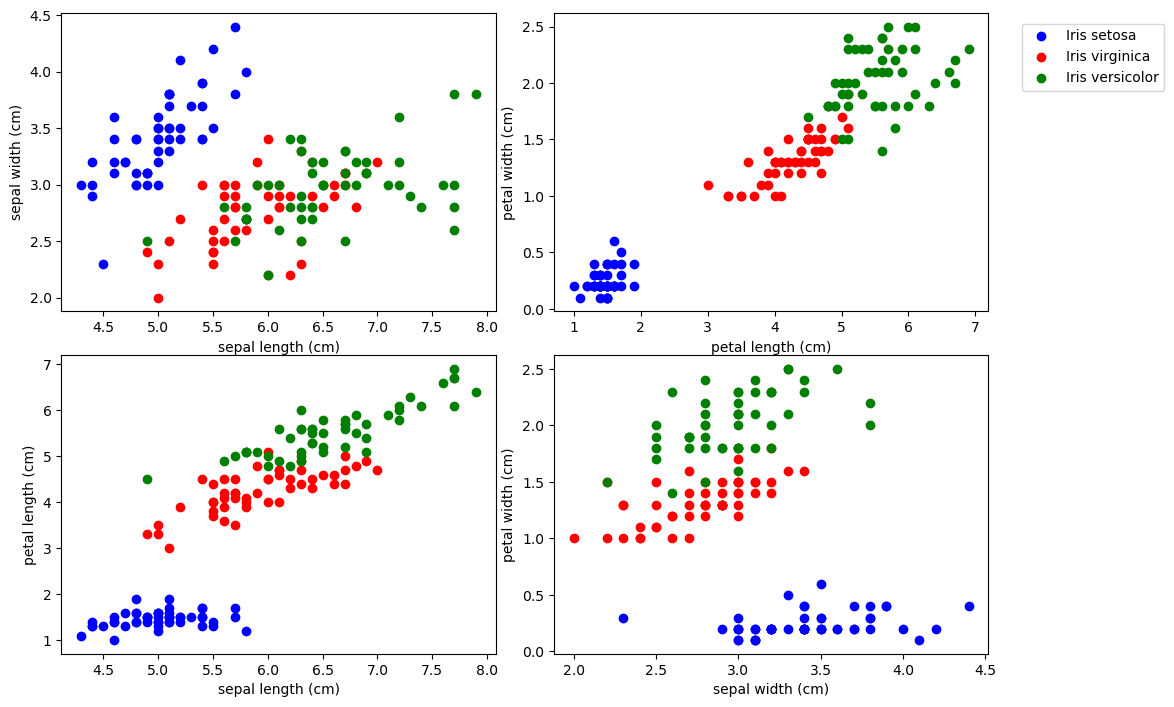

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

## Perform Train/Test/Split

In [6]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)



In [7]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [8]:
print(X_train.size(),y_train.size())

torch.Size([120, 4]) torch.Size([120])


In [9]:
print(X_test.size(),y_test.size())

torch.Size([30, 4]) torch.Size([30])


## Prepare DataLoader


In [10]:
trainloader = DataLoader(X_train, batch_size=30, shuffle=True)

testloader = DataLoader(X_test, batch_size=10, shuffle=False)

## Define loss equations and optimizations
As before, we'll utilize <a href='https://en.wikipedia.org/wiki/Cross_entropy'>Cross Entropy</a> with <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a><br>
For the optimizer, we'll use a variation of Stochastic Gradient Descent called <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam'>Adam</a> (short for Adaptive Moment Estimation), with <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><strong><tt>torch.optim.Adam()</tt></strong></a>

In [33]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Train the model

In [12]:
epochs = 1000
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    # a neat trick to save screen space:
    if i%50 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.15071142
epoch: 51  loss: 0.25436318
epoch: 101  loss: 0.06713332
epoch: 151  loss: 0.05549232
epoch: 201  loss: 0.05053147
epoch: 251  loss: 0.04751360
epoch: 301  loss: 0.04541453
epoch: 351  loss: 0.04389076
epoch: 401  loss: 0.04309450
epoch: 451  loss: 0.04229812
epoch: 501  loss: 0.04189246
epoch: 551  loss: 0.04163780
epoch: 601  loss: 0.04267689
epoch: 651  loss: 0.04141976
epoch: 701  loss: 0.04136890
epoch: 751  loss: 0.04133765
epoch: 801  loss: 0.04131778
epoch: 851  loss: 0.04132247
epoch: 901  loss: 0.04129786
epoch: 951  loss: 0.04129073


## Plot the loss function

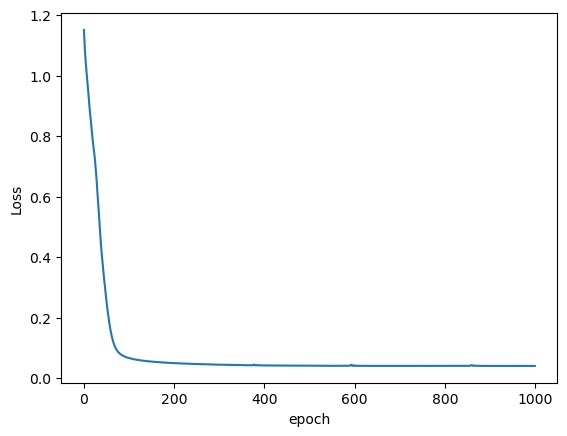

In [13]:
plt.plot(range(epochs), losses )
plt.ylabel('Loss')
plt.xlabel('epoch');

## Validate the model
Now we run the test set through the model to see if the loss calculation resembles the training data.

In [18]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.04615684


In [19]:
y_val.shape

torch.Size([30, 3])

In [20]:
_,y_pred = torch.max(y_val,axis=1)

y_pred

tensor([1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0,
        2, 2, 1, 1, 2, 2])

In [21]:
cm = confusion_matrix(y_test, y_pred)

cm

array([[ 8,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 14]])

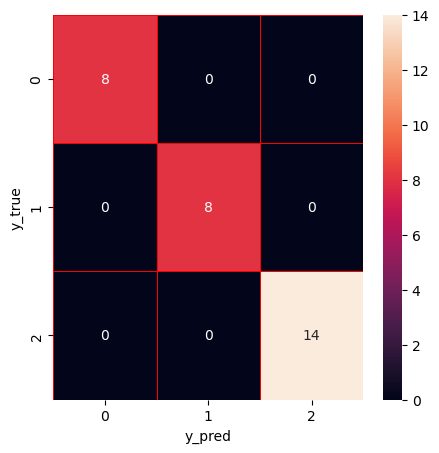

In [22]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Save the trained model to a file


### Save the model

In [14]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

### Load a new model
We'll load a new model object and test it as we had before to make sure it worked.

In [15]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)